Все необходимые данные для удобства были предварительно выгружены в гугл таблицу: https://docs.google.com/spreadsheets/d/1Lk4htrWysNaI97b0yLriGiWEq4gBnGlmaI9BL-CgMzE/edit?usp=sharing

In [1]:
import pandas as pd

In [2]:
#!pip install lxml

In [19]:
#! pip install html5lib

In [272]:
url = 'https://docs.google.com/spreadsheets/d/1Lk4htrWysNaI97b0yLriGiWEq4gBnGlmaI9BL-CgMzE/export?format=csv&gid=0'
data = pd.read_csv(url)
data.head()

,Country,Currency,Basic,Standard,Premium,"Basic, $","Standard,$","Premium, $",# of TV Shows,# of Movies,Total Library Size
0,Argentina,ARS,379,639,939,"3,74","6,30","9,26",3154,1606,4760
1,Australia,AUS,"10,99","16,99","22,99","7,84","12,12","16,39",4050,2064,6114
2,Austria,EUR,"7,99","12,99","17,99","9,03","14,67","20,32",3779,1861,5640
3,Belgium,EUR,"8,99","13,49","17,99","10,16","15,24","20,32",3374,1616,4990
4,Bolivia,USD,"7,99","10,99","13,99","7,99","10,99","13,99",3155,1836,4991


In [273]:
data['Basic'] = data['Basic'].apply(
lambda x: float(x.replace(',','.'))
) 
data['Standard'] = data['Standard'].apply(
lambda x: float(x.replace(',','.'))
) 
data['Premium'] = data['Premium'].apply(
lambda x: float(x.replace(',','.'))
) 
data['Basic, $'] = data['Basic, $'].apply(
lambda x: float(x.replace(',','.')))

data['Standard,$'] = data['Standard,$'].apply(
lambda x: float(x.replace(',','.'))
) 
data['Premium, $'] = data['Premium, $'].apply(
lambda x: float(x.replace(',','.'))
) 
data.head()

,Country,Currency,Basic,Standard,Premium,"Basic, $","Standard,$","Premium, $",# of TV Shows,# of Movies,Total Library Size
0,Argentina,ARS,379.00,639.00,939.00,3.74,6.30,9.26,3154,1606,4760
1,Australia,AUS,10.99,16.99,22.99,7.84,12.12,16.39,4050,2064,6114
2,Austria,EUR,7.99,12.99,17.99,9.03,14.67,20.32,3779,1861,5640
3,Belgium,EUR,8.99,13.49,17.99,10.16,15.24,20.32,3374,1616,4990
4,Bolivia,USD,7.99,10.99,13.99,7.99,10.99,13.99,3155,1836,4991


### Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны

In [274]:
url_inc = 'https://docs.google.com/spreadsheets/d/1Lk4htrWysNaI97b0yLriGiWEq4gBnGlmaI9BL-CgMzE/export?format=csv&gid=970283290'
income = pd.read_csv(url_inc)
income.head()

,Country,median_inc,mean_inc
0,Albania,2.578\n,3.141
1,Algeria,2.612,2.996
2,Angola,665,1.066
3,Argentina,5.319,6.935
4,Armenia,2.216,2.810


In [275]:
income['median_inc'] = income['median_inc'].apply(
lambda x: float(str(x).replace(',','.'))
)
income['mean_inc'] = income['mean_inc'].apply(
lambda x: float(str(x).replace(',','.')))

income['median_inc'] = income['median_inc'].apply(
lambda x: float(str(x).replace(',','.'))
)
income['mean_inc'] = income['mean_inc'].apply(
lambda x: float(str(x).replace(',','.')))

income.head()

,Country,median_inc,mean_inc
0,Albania,2.578,3.141
1,Algeria,2.612,2.996
2,Angola,665.000,1.066
3,Argentina,5.319,6.935
4,Armenia,2.216,2.810


In [276]:
income['median_inc'] = income['median_inc'].apply(
lambda x: x*1000 if x < 100 else x)

income['mean_inc'] = income['mean_inc'].apply(
lambda x: x*1000 if x < 100 else x)

income['median_inc'] = income['median_inc'].apply(
lambda x: x*1000 if x < 100 else x
)
income['mean_inc'] = income['mean_inc'].apply(
lambda x: x*1000 if x < 100 else x)

income.head()

,Country,median_inc,mean_inc
0,Albania,2578.0,3141.0
1,Algeria,2612.0,2996.0
2,Angola,665.0,1066.0
3,Argentina,5319.0,6935.0
4,Armenia,2216.0,2810.0


In [277]:
df = data.merge(income, how ='left')
df.dropna()
df.head()

,Country,Currency,Basic,Standard,Premium,"Basic, $","Standard,$","Premium, $",# of TV Shows,# of Movies,Total Library Size,median_inc,mean_inc
0,Argentina,ARS,379.00,639.00,939.00,3.74,6.30,9.26,3154,1606,4760,5319.0,6935.0
1,Australia,AUS,10.99,16.99,22.99,7.84,12.12,16.39,4050,2064,6114,17076.0,21329.0
2,Austria,EUR,7.99,12.99,17.99,9.03,14.67,20.32,3779,1861,5640,18405.0,20718.0
3,Belgium,EUR,8.99,13.49,17.99,10.16,15.24,20.32,3374,1616,4990,16157.0,17917.0
4,Bolivia,USD,7.99,10.99,13.99,7.99,10.99,13.99,3155,1836,4991,3631.0,4787.0


### Построить график корреляции между средним доходом (PPP) и ценой подписки

In [278]:
corr = df[['Basic, $','Standard,$','Premium, $','median_inc','mean_inc']].corr()
corr.style.background_gradient(cmap='coolwarm')


,"Basic, $","Standard,$","Premium, $",median_inc,mean_inc
"Basic, $",1.000000,0.894604,0.821898,0.460521,0.458361
"Standard,$",0.894604,1.000000,0.979242,0.549338,0.552805
"Premium, $",0.821898,0.979242,1.000000,0.603839,0.604134
median_inc,0.460521,0.549338,0.603839,1.000000,0.993626
mean_inc,0.458361,0.552805,0.604134,0.993626,1.000000


<AxesSubplot:xlabel='median_inc', ylabel='Basic, $'>

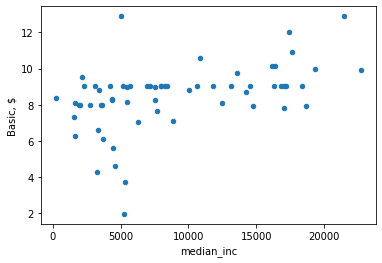

In [279]:
df.plot.scatter('median_inc', 'Basic, $')

<AxesSubplot:xlabel='median_inc', ylabel='Standard,$'>

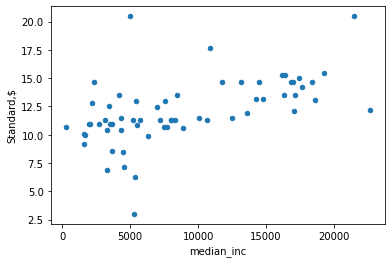

In [280]:
df.plot.scatter('median_inc', 'Standard,$')

<AxesSubplot:xlabel='median_inc', ylabel='Premium, $'>

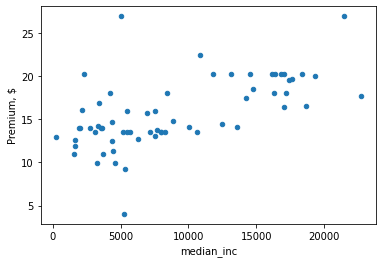

In [281]:
df.plot.scatter('median_inc', 'Premium, $')

### Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [282]:
aver_price = pd.DataFrame()
aver_price[['Country','Currency']] = df[['Country','Currency']]
aver_price[['aver_price']] = (df['Basic']+df['Standard']+df['Premium'])/3
aver_price.head()

,Country,Currency,aver_price
0,Argentina,ARS,652.333333
1,Australia,AUS,16.990000
2,Austria,EUR,12.990000
3,Belgium,EUR,13.490000
4,Bolivia,USD,10.990000


### Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [327]:
url_cont = 'https://docs.google.com/spreadsheets/d/1Lk4htrWysNaI97b0yLriGiWEq4gBnGlmaI9BL-CgMzE/export?format=csv&gid=1356129593'
regions = pd.read_csv(url_cont)


In [328]:
df_reg = df.copy().merge(regions, how ='left')
#df_reg = df_reg.dropna()
df_reg[['aver_price,$']] = (df['Basic, $'] +  df['Standard,$'] + df['Premium, $'])/3
df_reg[['Continent', 'aver_price,$']].groupby('Continent').mean()

,"aver_price,$"
Continent,
Africa,9.630000
Asia,10.290370
Europe,13.356092
North America,11.518000
Oceania,12.436667
South America,9.287083


### Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [307]:
czech = df.copy()[df.copy()['Country']=='Czech Republic']
czech[['Relative_Basic']] = czech['Basic, $']/czech['median_inc']
czech[['Relative_Stand']] = czech['Standard,$']/czech['median_inc']
czech[['Relative_Prem']] = czech['Premium, $']/czech['median_inc']
czech[['Relative_Basic','Relative_Stand','Relative_Prem']]

,Relative_Basic,Relative_Stand,Relative_Prem
12,0.000879,0.001144,0.001409


### Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [313]:
top_ser = df.copy().sort_values('# of TV Shows',ascending = False).reset_index(drop=True)['Country'].head()
pd.DataFrame(top_ser)

,Country
0,Czech Republic
1,Slovakia
2,Bulgaria
3,Hungary
4,United Kingdom


### Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [315]:
rus = df.copy()[df.copy()['Country']=='Russia']
rus[['Relative_Basic']] = rus['Basic, $']*100/rus['median_inc']
rus[['Relative_Stand']] = rus['Standard,$']*100/rus['median_inc']
rus[['Relative_Prem']] = rus['Premium, $']*100/rus['median_inc']
rus[['Relative_Basic','Relative_Stand','Relative_Prem']]

,Relative_Basic,Relative_Stand,Relative_Prem
48,0.147711,0.196948,0.246366


P.S. Только здесь осознал, что у меня доход ВВП подушевого, на логику не влияет, но цифры кривятся...

### На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

In [316]:
df.columns

Index(['Country', 'Currency', 'Basic', 'Standard', 'Premium', 'Basic, $',
       'Standard,$', 'Premium, $', '# of TV Shows', '# of Movies',
       'Total Library Size', 'median_inc', 'mean_inc'],
      dtype='object')

In [322]:
Cost_per_title = pd.DataFrame()
Cost_per_title[['Country']] = df[['Country']]
Cost_per_title[['Cost_per_title']] = df['Standard,$']/df['Total Library Size']
Cost_per_title = Cost_per_title.sort_values('Cost_per_title').reset_index(drop=True)
Cost_per_title[Cost_per_title['Country']=='Russia']

,Country,Cost_per_title
17,Russia,0.001898


### В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [326]:
pd.DataFrame(Cost_per_title['Country'].head(1))

,Country
0,Turkey
